In [9]:
import pandas as pd
import cobra
from cobra import Model, Reaction, Metabolite
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
CDmod=cobra.io.load_json_model('CDmod.json')

## 2 Different Media Types

In [11]:
def minimal(mod):
    for x in mod.reactions:
        if 'EX_' in  x.id:
            x.lower_bound=0 
    mod.reactions.EX_trp__L_e.lower_bound=-10
    mod.reactions.EX_cys__L_e.lower_bound=-10
    mod.reactions.EX_ile__L_e.lower_bound=-10
    mod.reactions.EX_leu__L_e.lower_bound=-10
    mod.reactions.EX_met__L_e.lower_bound=-10
    mod.reactions.EX_pro__L_e.lower_bound=-10
    mod.reactions.EX_val__L_e.lower_bound=-10
    mod.reactions.EX_pnto__R_e.lower_bound=-10
    mod.reactions.EX_btn_e.lower_bound=-10
    mod.reactions.EX_pydxn_e.lower_bound=-10
    mod.reactions.EX_h_e.lower_bound=-10
    mod.reactions.EX_h2o_e.lower_bound=-10
    mod.reactions.EX_na1_e.lower_bound=-10
    mod.reactions.EX_pi_e.lower_bound=-10
    
    mod.reactions.EX_glc__D_e.lower_bound=-10
    return mod

In [12]:
def cadm(mod):
    #step one close everything else
    for x in mod.reactions:
        if 'EX_' in  x.id:
            x.lower_bound=0 
    mod.reactions.EX_trp__L_e.lower_bound=-10
    mod.reactions.EX_cys__L_e.lower_bound=-10
    mod.reactions.EX_ile__L_e.lower_bound=-10
    mod.reactions.EX_leu__L_e.lower_bound=-10
    mod.reactions.EX_met__L_e.lower_bound=-10
    mod.reactions.EX_pro__L_e.lower_bound=-10
    mod.reactions.EX_val__L_e.lower_bound=-10
    mod.reactions.EX_pnto__R_e.lower_bound=-10
    mod.reactions.EX_btn_e.lower_bound=-10
    mod.reactions.EX_pydxn_e.lower_bound=-10
    mod.reactions.EX_glc__D_e.lower_bound=-10
    mod.reactions.EX_thm_e.lower_bound=-10
    mod.reactions.EX_ncam_e.lower_bound=-10
    mod.reactions.EX_ribflv_e.lower_bound=-10
    mod.reactions.EX_4abz_e.lower_bound=-10
    mod.reactions.EX_ala__L_e.lower_bound=-10
    mod.reactions.EX_arg__L_e.lower_bound=-10
    mod.reactions.EX_asp__L_e.lower_bound=-10
    mod.reactions.EX_asn__L_e.lower_bound=-10
    mod.reactions.EX_gln__L_e.lower_bound=-10
    mod.reactions.EX_glu__L_e.lower_bound=-10
    mod.reactions.EX_tyr__L_e.lower_bound=-10
    mod.reactions.EX_gly_e.lower_bound=-10
    mod.reactions.EX_his__L_e.lower_bound=-10
    mod.reactions.EX_lys__L_e.lower_bound=-10
    mod.reactions.EX_met__L_e.lower_bound=-10
    mod.reactions.EX_ser__L_e.lower_bound=-10
    mod.reactions.EX_thr__L_e.lower_bound=-10
    mod.reactions.EX_phe__L_e.lower_bound=-10
    mod.reactions.EX_h_e.lower_bound=-10
    mod.reactions.EX_h2o_e.lower_bound=-10
    mod.reactions.EX_na1_e.lower_bound=-10
    mod.reactions.EX_pi_e.lower_bound=-10
    
    return mod

In [13]:
print ('Growth rate on minimial media', minimal(CDmod).optimize().f)
print ('Growth rate on CADM media', cadm(CDmod).optimize().f)

('Growth rate on minimial media', 0.07812499999999982)
('Growth rate on CADM media', 0.30978618595664253)


## Look at alternative carbon sources in minimal media

In [14]:
biologMetabs=pd.read_csv('exchBiolog.csv')
biologMetabsList=[]
for r, row in biologMetabs.iterrows():
    biologMetabsList.append(biologMetabs.iloc[r]['Reaction'])

In [15]:
listRates=[]
for r in biologMetabsList:
    minimal(CDmod)
    CDmod.reactions.EX_glc__D_e.lower_bound=0
    CDmod.reactions.get_by_id(r).lower_bound=-10
    CDmod.optimize()
    listRates.append(CDmod.optimize().f)

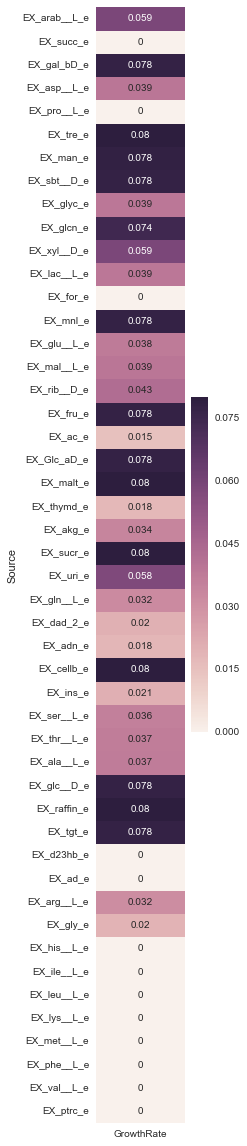

In [16]:
sources = pd.DataFrame({'Source': biologMetabsList, 'GrowthRate': listRates})
sources2=sources.set_index('Source')
plt.subplots(figsize=(2,20))
sns.heatmap(sources2, annot=True)
plt.show()